<a href="https://colab.research.google.com/github/mahaairshad-shu/MechanicsPython2025/blob/main/Week%204/Wk4_Ex2_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![SHU](https://drive.google.com/uc?export=view&id=1oauWClN3B2tjg1AeVHtfjAXZg13d9HXL)

#**Modelling Mechanics of Sports Engineering**
##Week 4
###Exercise 2
A professional cycling team want to simulate performance in a 1km time trial for a particular course. The course is shown below:

![Terrain](https://drive.google.com/uc?export=view&id=1QwmjYBsUienOlDOY6yiuYnKjcW1FhtKu)


The team are only concerned with the effect of aerodynamics so rolling resistance and other resistive forces in the bike can be disregarded.
Create a function which contains a model of the rider for the course described above.
Write code that uses this function to simulate the performance of the rider and plots the speed of the rider as they complete the course.
Assume the rider is generating a constant power of 400 watts, where power:

𝑃=𝐹∙𝑣

*F* is propulsive force and *v* is the speed of the rider.


**Solution**

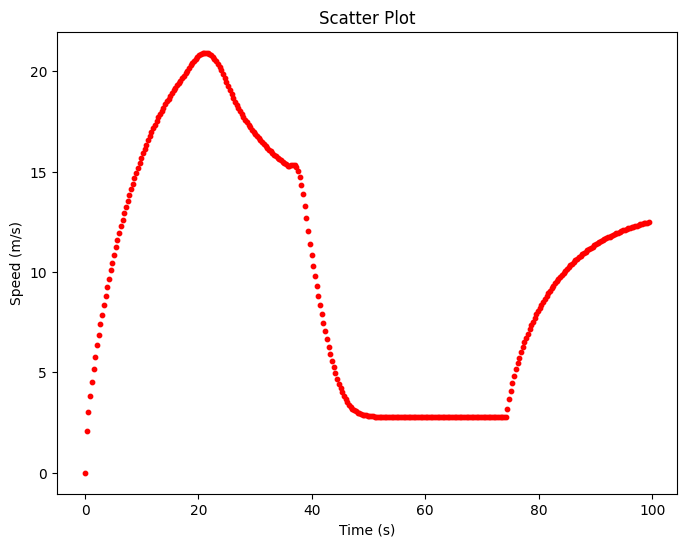

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# our differential equation
def CyclingDE(t,y):
  '''
  our differential equation
  y[0] is position along the course
  y[1] is velocity along the course
  dy is the differential of y
  dy[0] is velocity along the course
  dy[1] is acceleration along the course
  note that the course changes angle as we move along it!
  '''

  #we need to know the angle of the cyclist movement based on position:
  if y[0]<=300:
    A=np.radians(6) #downhill negative
  elif y[0]>300 and y[0]<=600:
    A=0;
  elif y[0]>600 and y[0]<=750:
    A=np.radians(-12) #uphill positive
  else:
    A=0

  g=9.81
  #We will assume a mass of 70kg
  m=70

  # Forces
  # Force = Power/Velocity. we have to guard against dividing by zero
  if y[0]==0:
    Fp=m*g #assuming 1:1 ration in lowest gear when starting
  else:
    Fp=400/y[1]

  '''
  The drag force on a cyclist can be calculated using the equation
  \(Fd=12\cdot \rho \cdot A\cdot Cd\cdot v^{2}\), where:
  0.5 x air density x frontal area x drag coefficient x velocity squared
  Fd: is the drag force  ρ: is the density of the air  A: is the frontal area of the cyclist and bike  Cd: is the coefficient of drag  v: is the velocity of the cyclist relative to the air
  '''
  p=1.2 #air density
  FA=0.36 #frontal area
  Cd=0.8 # drag coefficent
  D=0.5*p*FA*Cd*y[1]*y[1]

  # gravity
  Fg=m*g*np.sin(A)

  #overall force
  F=Fp+Fg-D
  #print([np.sin(A),Fp, Fg, D])

  # calculate dy
  dy=[0,0]
  dy[0]=y[1]; # velocity equals velocity

  # accleration is force/mass
  dy[1]=F/m;

  return dy

yin=[0,0]
tend=300
sol = solve_ivp(CyclingDE, [0, tend], yin, dense_output=True)

t=np.linspace(0,tend,1000)
z = sol.sol(t) #extrtacting the values from the solution
distance=z[0]
speed=z[1]

# crop to length of course
distance=distance[distance<1000]
speed=speed[0:len(distance)]
t=t[0:len(distance)]

plt.figure(figsize=(8, 6))
plt.title('Scatter Plot')
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.scatter(t, speed, color='Red', marker='o', s=10) #s is markersize